In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



In [6]:
#@title Data Uploading
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print(fn)

In [8]:
#@title Data Reading
# data=pd.read_csv('/content/'+str(fn),sep=';')
data =pd.read_csv('D:/Notebooks/Datasets/winequality-red.csv')

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

on a scale of 5-9 7< are White pure quality wine 7>red wine
---



In [13]:
data['best quality'] = [ 1 if x>=7 else 0 for x in data.quality] 

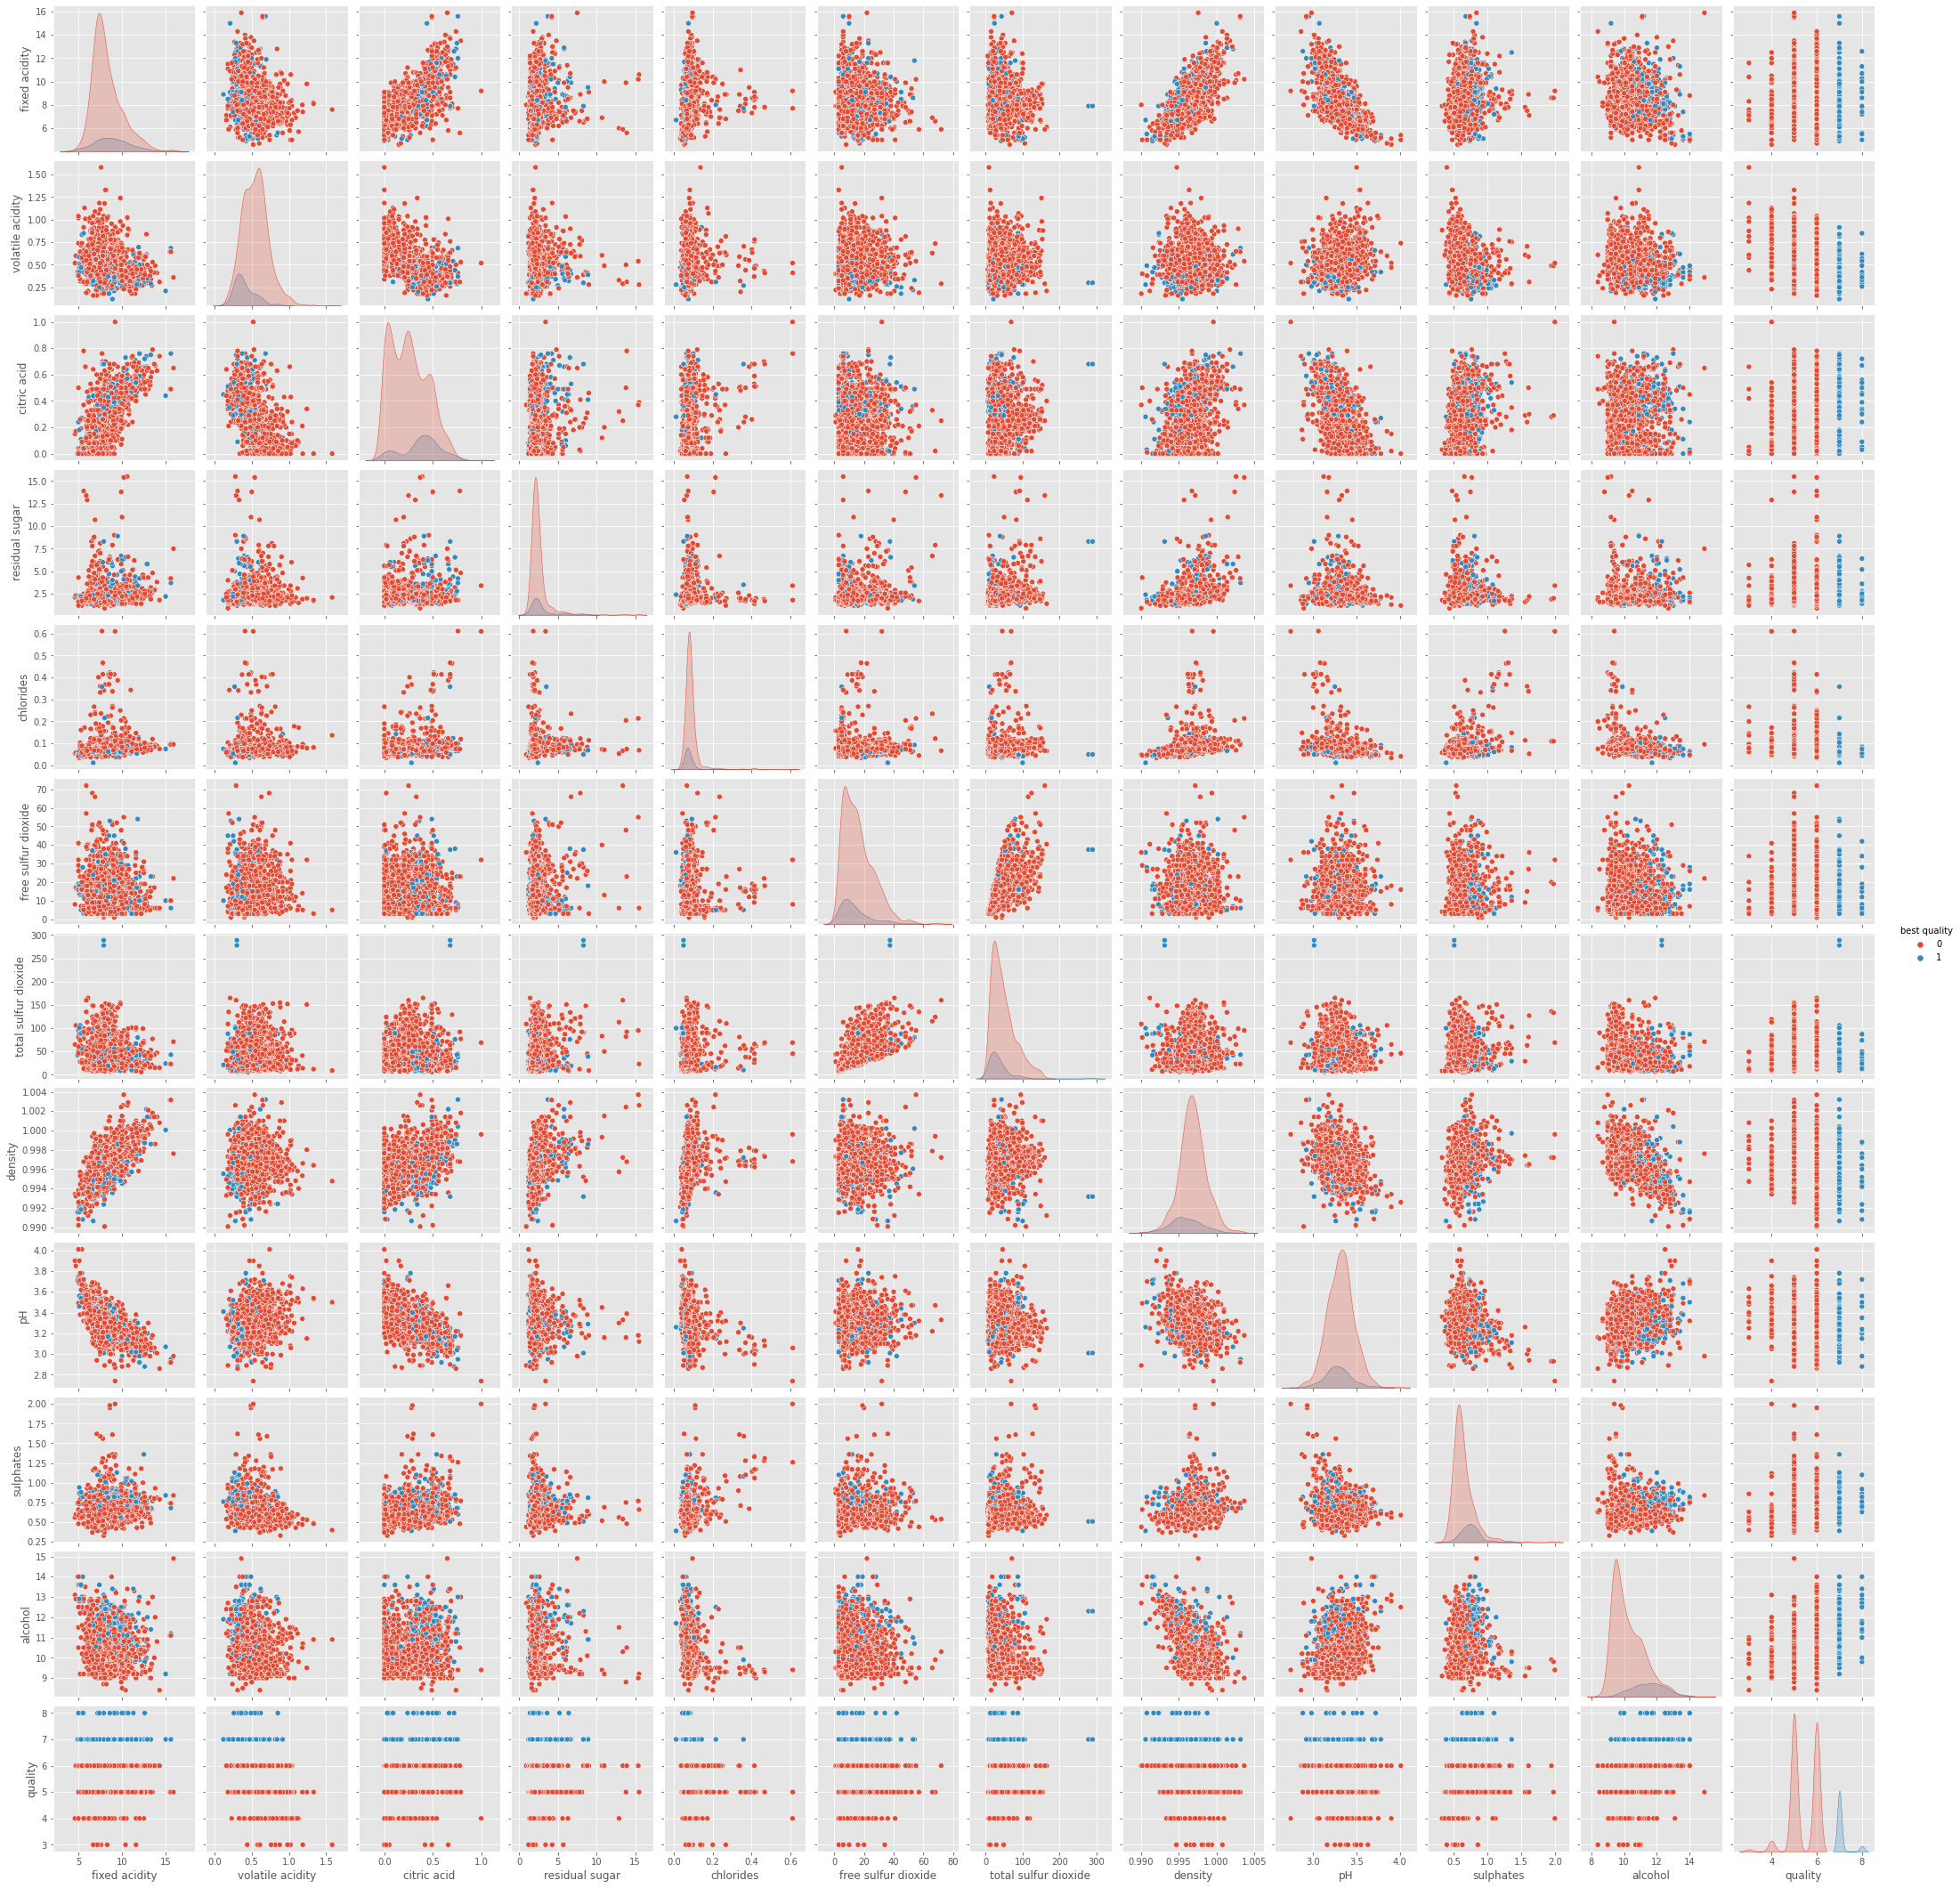

In [14]:
sns.pairplot(data,hue='best quality')
plt.show()

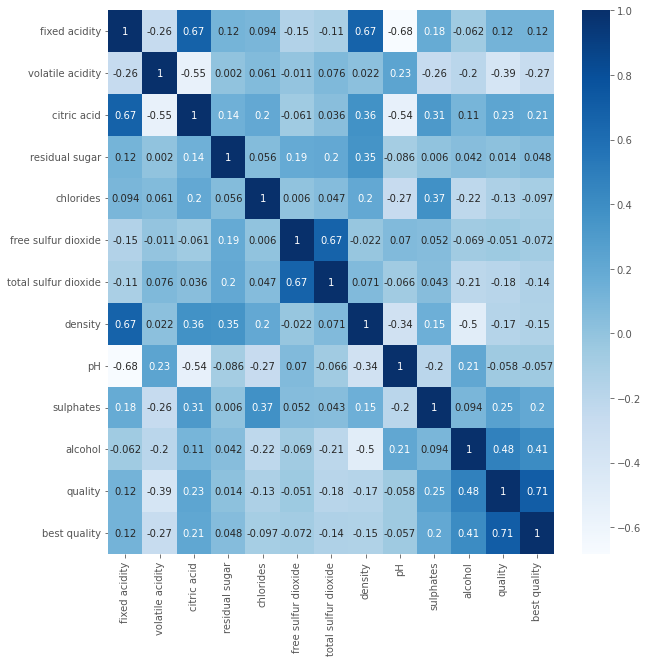

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().round(3),annot=True,cmap='Blues')
plt.show()

In [16]:
x = data[['residual sugar','chlorides','total sulfur dioxide','density','alcohol','quality']]

In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

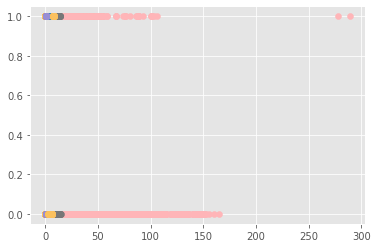

In [18]:
for i in data.columns.to_list()[:12]:
  plt.scatter(data[i],data['best quality'])
plt.show()

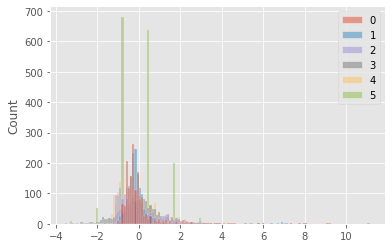

In [19]:
sns.histplot(x,color='lime')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
Xtrain ,Xtest ,ytrain ,ytest = train_test_split(x,data['best quality'],test_size =0.2,random_state=40)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg = LogisticRegression()
lg.fit(Xtrain,ytrain)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,plot_roc_curve

In [25]:
print('Accuracy = ',accuracy_score(lg.predict(Xtest),ytest)*100)

Accuracy =  100.0


In [26]:
print(classification_report(lg.predict(Xtest),ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00        48

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [28]:
confusion_matrix(lg.predict(Xtest),ytest)

array([[272,   0],
       [  0,  48]], dtype=int64)

###SVM

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Accuracy = ',accuracy_score(sv.predict(Xtest),ytest)*100)

Accuracy =  100.0


In [ ]:
print(classification_report(sv.predict(Xtest),ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       215

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



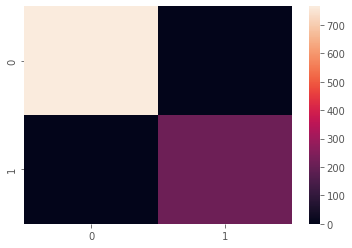

In [ ]:
sns.heatmap(confusion_matrix(sv.predict(Xtest),ytest),annot=False)
plt.show()

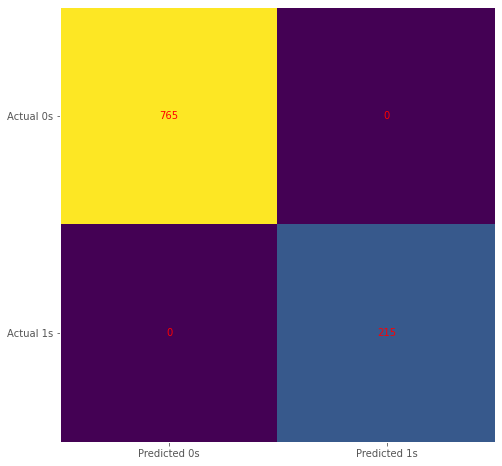

In [ ]:
cm = confusion_matrix(ytest, sv.predict(Xtest))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
confusion_matrix(sv.predict(Xtest),ytest)

array([[765,   0],
       [  0, 215]])

In [ ]:
f1_score(sv.predict(Xtest),ytest)

1.0